**Python Version   : 2.7.11** <br>
**Ipython Version  : 4.0.1**

In [6]:
import numpy as np
import pylab

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# let's embed the plots in the notebook itself
%matplotlib inline

In [7]:
def generate_training_data(number_samples_positive_class, number_samples_negative_class):
    """
    Generates positive and negative training examples and plots them 
    
    Arguments:    
    number_samples_positive_class : number of data points from the positive class, drawn as blue circles
    number_samples_negative_class : number of data points from the negative class, drawn as red circles    
    """
    # generate training data 
    positive_samples = np.ones((number_samples_positive_class, 3))
    negative_samples = np.ones((number_samples_negative_class, 3))

    # sample the training examples from multi-variate normal 
    positive_samples[:,:-1] = np.random.multivariate_normal([1,3], [[1,0],[0,1]], number_samples_positive_class)
    negative_samples[:,:-1] = np.random.multivariate_normal([2,-2.5], [[0.5,0],[0,0.5]], number_samples_negative_class)

    pylab.plot(positive_samples[:,0], positive_samples[:,1], 'bo')
    pylab.plot(negative_samples[:,0], negative_samples[:,1], 'ro')
    pylab.show()
    return positive_samples, negative_samples

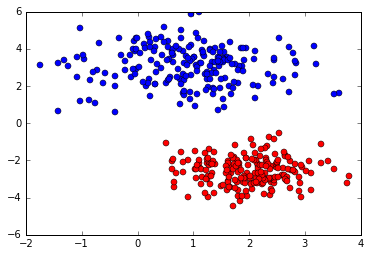

In [8]:
positive_examples, negative_examples = generate_training_data(200,200)

In [9]:
def plot_2d_decision_boundary(positive_samples, negative_samples, weights):
    """
    Plots the provided samples along with a decision boundary defined by the provided weights
    
    Arguments:
    
    positive_samples -- ndarray (num_samples, num_dims) of data points from the positive class, drawn as blue circles
    negative_samples -- ndarray (num_samples, num_dims) of data points from the negative class, drawn as red circles
    weights -- [A,B,C] weights for the line equation, used to draw the decision boundary in green    
    """
    if np.isclose(weights[1], 0):
        if np.isclose(weights[0], 0):
            x = y = np.array([-6, 6], dtype = 'float32')
        else:
            y = np.array([-6, 6], dtype='float32')
            x = -(weights[1] * y + weights[2])/weights[0]
    else:
        x = np.array([-6, 6], dtype='float32')
        y = -(weights[0] * x + weights[2])/weights[1]
        

    pylab.xlim(-6, 6)
    pylab.ylim(-6, 6)                      
    pylab.plot(positive_samples[:,0], positive_samples[:,1], 'bo')
    pylab.plot(negative_samples[:,0], negative_samples[:,1], 'ro')
    pylab.plot(x, y, 'g', linewidth=2.0)

<function __main__.manual_classifier>

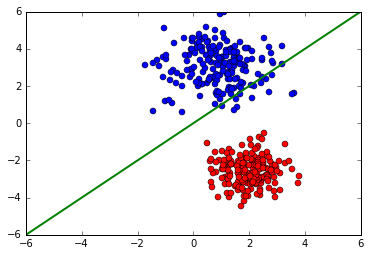

In [10]:
def manual_classifier(A, B, C):
    plot_2d_decision_boundary(positive_examples, negative_examples, np.array([A,B,C], dtype='float32'))
 
interact(manual_classifier, A=(-3.0,3.0), B=(-3.0,3.0), C=(-3.0, 3.0))